In [2]:
pip install pandas scikit-learn matplotlib


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [5]:
from google.colab import files
uploaded = files.upload()

Saving JaipurFinalCleanData.csv to JaipurFinalCleanData.csv


In [6]:
df = pd.read_csv('JaipurFinalCleanData.csv')

In [7]:
print(df.columns)

Index(['date', 'meantempm', 'maxtempm', 'mintempm', 'meantempm_1',
       'meantempm_2', 'meantempm_3', 'meandewptm_1', 'meandewptm_2',
       'meandewptm_3', 'meanpressurem_1', 'meanpressurem_2', 'meanpressurem_3',
       'maxhumidity_1', 'maxhumidity_2', 'maxhumidity_3', 'minhumidity_1',
       'minhumidity_2', 'minhumidity_3', 'maxtempm_1', 'maxtempm_2',
       'maxtempm_3', 'mintempm_1', 'mintempm_2', 'mintempm_3', 'maxdewptm_1',
       'maxdewptm_2', 'maxdewptm_3', 'mindewptm_1', 'mindewptm_2',
       'mindewptm_3', 'maxpressurem_1', 'maxpressurem_2', 'maxpressurem_3',
       'minpressurem_1', 'minpressurem_2', 'minpressurem_3', 'precipm_1',
       'precipm_2', 'precipm_3'],
      dtype='object')


In [8]:
print(df.head())

         date  meantempm  maxtempm  mintempm  meantempm_1  meantempm_2  \
0  2016-05-04         34        41        27         35.0         36.0   
1  2016-05-05         31        38        24         34.0         35.0   
2  2016-05-06         28        34        21         31.0         34.0   
3  2016-05-07         30        38        23         28.0         31.0   
4  2016-05-08         34        41        26         30.0         28.0   

   meantempm_3  meandewptm_1  meandewptm_2  meandewptm_3  ...  mindewptm_3  \
0         34.0           6.0           4.0          -1.0  ...        -10.0   
1         36.0           7.0           6.0           4.0  ...         -2.0   
2         35.0          11.0           7.0           6.0  ...         -2.0   
3         34.0          13.0          11.0           7.0  ...          0.0   
4         31.0          10.0          13.0          11.0  ...          6.0   

   maxpressurem_1  maxpressurem_2  maxpressurem_3  minpressurem_1  \
0          1009.0

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [10]:
df = df.dropna(subset=['meantempm'])

In [11]:
X = df[['Year', 'Month', 'Day']]
y = df['meantempm']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 30.166921963062002


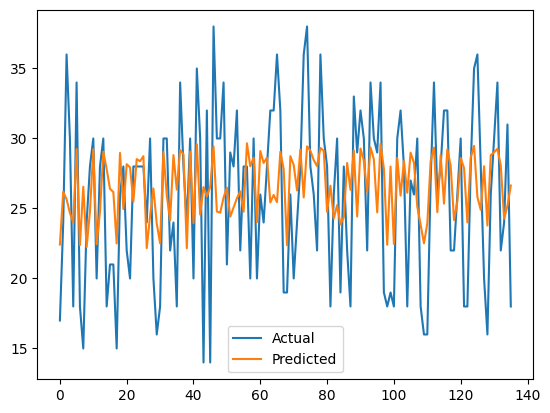

In [29]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()